In [1]:
# Useful stuff
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import pytraj as pt
import glob
import pickle

# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots as mpl
import pyemma.coordinates as coor

In [2]:
directo='/home/janet/Desktop/HSVTK/APO/'
trajfiles_APO=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_APO='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_APO.pdb'

directo='/home/janet/Desktop/HSVTK/APO_MG/'
trajfiles_APOMG=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_APOMG='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_APO_MG.pdb'

directo='/home/janet/Desktop/HSVTK/THM/'
trajfiles_THM=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_THM.pdb'

directo='/home/janet/Desktop/HSVTK/GCV/'
trajfiles_GCV=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_GCV.pdb'

directo='/home/janet/Desktop/HSVTK/THM_ATP/'
trajfiles_THM_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM_ATP='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_THM_ATP.pdb'

directo='/home/janet/Desktop/HSVTK/GCV_ATP/'
trajfiles_GCV_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV_ATP='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_GCV_ATP.pdb'

In [3]:
trajfiles = []
trajfiles.append(trajfiles_APO)
trajfiles.append(trajfiles_APOMG)
trajfiles.append(trajfiles_THM)
trajfiles.append(trajfiles_GCV)
trajfiles.append(trajfiles_THM_ATP)
trajfiles.append(trajfiles_GCV_ATP)
#trajfiles.append(trajfiles_THM_ADP)
#trajfiles.append(trajfiles_GCV_ADP)
topfiles = []
topfiles.append(topfile_APO)
topfiles.append(topfile_APOMG)
topfiles.append(topfile_THM)
topfiles.append(topfile_GCV)
topfiles.append(topfile_THM_ATP)
topfiles.append(topfile_GCV_ATP)
#topfiles.append(topfile_THM_ADP)
#topfiles.append(topfile_GCV_ADP)

In [4]:
# Load pytraj trajectories
SYS1 = pt.iterload(trajfiles[0], top=topfiles[0])
SYS2 = pt.iterload(trajfiles[1], top=topfiles[1])
SYS3 = pt.iterload(trajfiles[2], top=topfiles[2])
SYS4 = pt.iterload(trajfiles[3], top=topfiles[3])
SYS5 = pt.iterload(trajfiles[4], top=topfiles[4])
SYS6 = pt.iterload(trajfiles[5], top=topfiles[5])

In [5]:
# Compute Dihedral for monomer A
SYS1_dha = pt.dihedral(SYS1,'@800 @2777 @2515 @2694')
SYS2_dha = pt.dihedral(SYS2,'@800 @2777 @2515 @2694')
SYS3_dha = pt.dihedral(SYS3,'@800 @2777 @2515 @2694')
SYS4_dha = pt.dihedral(SYS4,'@800 @2777 @2515 @2694')
SYS5_dha = pt.dihedral(SYS5,'@800 @2777 @2515 @2694')
SYS6_dha = pt.dihedral(SYS6,'@800 @2777 @2515 @2694')

#Converted to be 1D array
SYS1_dhA =np.hstack(SYS1_dha)
SYS2_dhA =np.hstack(SYS2_dha)
SYS3_dhA =np.hstack(SYS3_dha)
SYS4_dhA =np.hstack(SYS4_dha)
SYS5_dhA =np.hstack(SYS5_dha)
SYS6_dhA =np.hstack(SYS6_dha)

In [6]:
# Compute Dihedral for monomer B
SYS1_dhb = pt.dihedral(SYS1,'@5807 @7784 @7522 @7701')
SYS2_dhb = pt.dihedral(SYS2,'@5807 @7784 @7522 @7701')
SYS3_dhb = pt.dihedral(SYS3,'@5807 @7784 @7522 @7701')
SYS4_dhb = pt.dihedral(SYS4,'@5807 @7784 @7522 @7701')
SYS5_dhb = pt.dihedral(SYS5,'@5807 @7784 @7522 @7701')
SYS6_dhb = pt.dihedral(SYS6,'@5807 @7784 @7522 @7701')

#Converted to be 1D array
SYS1_dhB =np.hstack(SYS1_dhb)
SYS2_dhB =np.hstack(SYS2_dhb)
SYS3_dhB =np.hstack(SYS3_dhb)
SYS4_dhB =np.hstack(SYS4_dhb)
SYS5_dhB =np.hstack(SYS5_dhb)
SYS6_dhB =np.hstack(SYS6_dhb)

In [14]:
frames = np.array(list(range(len(SYS1_dhA))))

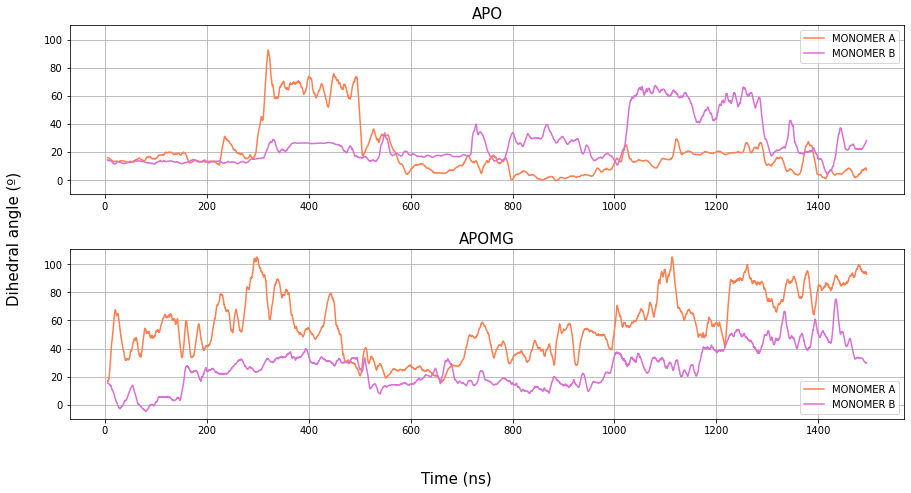

In [15]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(13,7), sharey=True)
window=500
x=((frames-500/2)/50)

ax1.plot(x,pd.Series(SYS1_dha).rolling(window).mean(), label = 'MONOMER A', color='coral', linestyle='-')
ax1.plot(x,pd.Series(SYS1_dhb).rolling(window).mean(), label = 'MONOMER B', color='orchid', linestyle='-')

ax2.plot(x,pd.Series(SYS2_dha).rolling(window).mean(), label = 'MONOMER A', color='coral', linestyle='-')
ax2.plot(x,pd.Series(SYS2_dhb).rolling(window).mean(), label = 'MONOMER B', color='orchid', linestyle='-')

ax1.set_title('APO', fontsize=15)
ax2.set_title('APOMG', fontsize=15)

ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)
         
ax1.grid()
ax2.grid()
   
fig.supxlabel('Time (ns)', fontsize=15)
fig.supylabel('Dihedral angle (º)', fontsize=15)

ax1.legend(loc='upper right', fontsize=10)     
ax2.legend(loc='lower right', fontsize=10)   

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

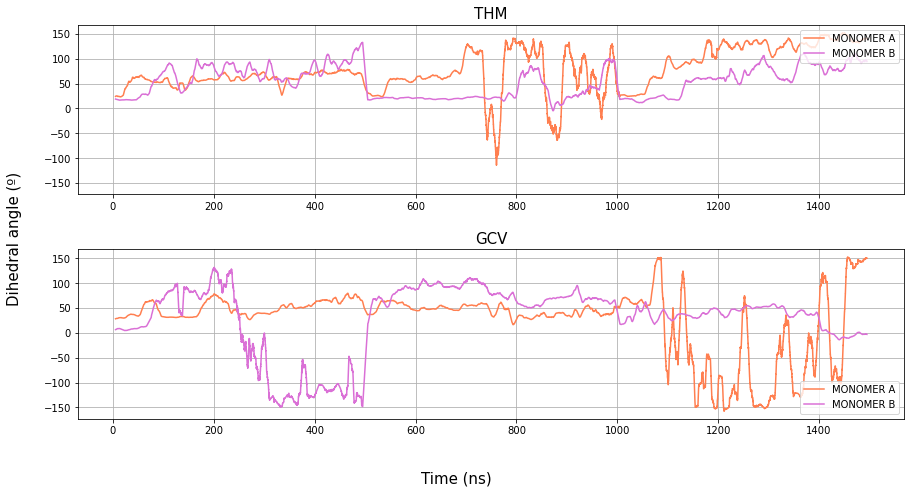

In [18]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(13,7), sharey=True)
window=500
x=((frames-500/2)/50)

ax1.plot(x,pd.Series(SYS3_dhA).rolling(window).mean(), label = 'MONOMER A', color='coral', linestyle='-')
ax1.plot(x,pd.Series(SYS3_dhB).rolling(window).mean(), label = 'MONOMER B', color='orchid', linestyle='-')

ax2.plot(x,pd.Series(SYS4_dha).rolling(window).mean(), label = 'MONOMER A', color='coral', linestyle='-')
ax2.plot(x,pd.Series(SYS4_dhb).rolling(window).mean(), label = 'MONOMER B', color='orchid', linestyle='-')

ax1.set_title('THM', fontsize=15)
ax2.set_title('GCV', fontsize=15)

ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)
         
ax1.grid()
ax2.grid()
   
fig.supxlabel('Time (ns)', fontsize=15)
fig.supylabel('Dihedral angle (º)', fontsize=15)

ax1.legend(loc='upper right', fontsize=10)     
ax2.legend(loc='lower right', fontsize=10)   

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

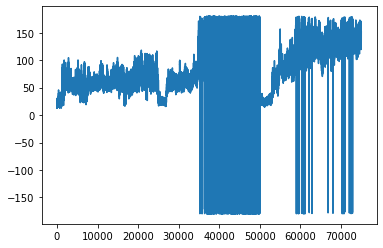

In [24]:
figure, ax = plt.subplots()
ax.plot(SYS3_dhA)

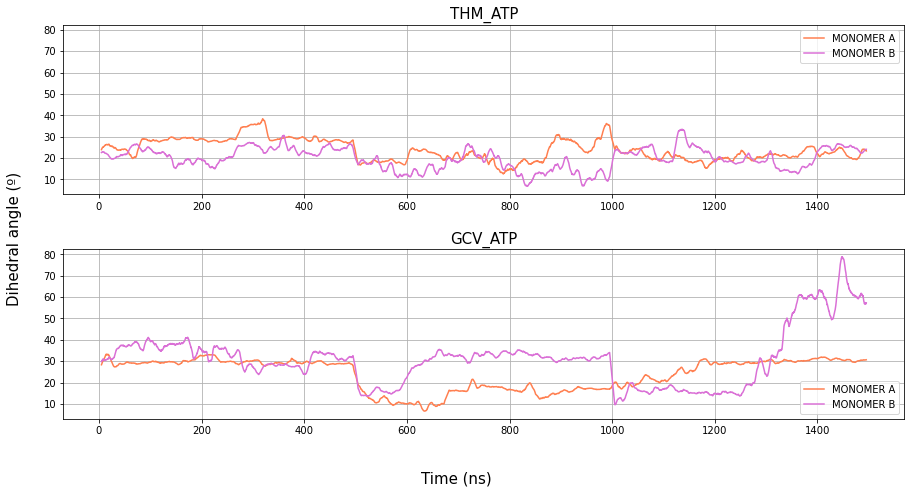

In [17]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(13,7), sharey=True)
window=500
x=((frames-500/2)/50)

ax1.plot(x,pd.Series(SYS5_dha).rolling(window).mean(), label = 'MONOMER A', color='coral', linestyle='-')
ax1.plot(x,pd.Series(SYS5_dhb).rolling(window).mean(), label = 'MONOMER B', color='orchid', linestyle='-')

ax2.plot(x,pd.Series(SYS6_dha).rolling(window).mean(), label = 'MONOMER A', color='coral', linestyle='-')
ax2.plot(x,pd.Series(SYS6_dhb).rolling(window).mean(), label = 'MONOMER B', color='orchid', linestyle='-')

ax1.set_title('THM_ATP', fontsize=15)
ax2.set_title('GCV_ATP', fontsize=15)

ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)
         
ax1.grid()
ax2.grid()
   
fig.supxlabel('Time (ns)', fontsize=15)
fig.supylabel('Dihedral angle (º)', fontsize=15)

ax1.legend(loc='upper right', fontsize=10)     
ax2.legend(loc='lower right', fontsize=10)   

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)